In [1]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly

# 1. Business Understanding
Goal: Estimate HDB resale flat prices.

# 2. Data Understanding

## 2.1 Load dataset

In [2]:
## Read *.csv file into pandas DataFrame
FILE_PATH = "hdb.csv"
df = pd.read_csv(FILE_PATH)
df ## Display dataframe

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
207870,2025-02,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,62 years,1100888.0
207871,2025-04,YISHUN,EXECUTIVE,877,YISHUN ST 81,07 TO 09,142.0,Apartment,1987,61 years 09 months,988000.0
207872,2025-04,YISHUN,EXECUTIVE,828,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,61 years 09 months,975000.0
207873,2025-05,YISHUN,EXECUTIVE,828,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,61 years 09 months,1000000.0


## 2.2 Summary Statistics

In [3]:
## Understand the type of variable for each column
df.info() ## Alternatively: df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207875 entries, 0 to 207874
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                207875 non-null  object 
 1   town                 207875 non-null  object 
 2   flat_type            207875 non-null  object 
 3   block                207875 non-null  object 
 4   street_name          207875 non-null  object 
 5   storey_range         207875 non-null  object 
 6   floor_area_sqm       207875 non-null  float64
 7   flat_model           207875 non-null  object 
 8   lease_commence_date  207875 non-null  int64  
 9   remaining_lease      207875 non-null  object 
 10  resale_price         207875 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 17.4+ MB


In [4]:
## Check for missing data
df.isna().sum() ## Alternative: df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [5]:
## Describe data distribution
df.describe(include="all")

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
count,207875,207875,207875,207875,207875,207875,207875.000000,207875,207875.000000,207875,2.078750e+05
unique,101,26,7,2741,575,17,NaN,21,NaN,688,NaN
top,2024-07,SENGKANG,4 ROOM,2,YISHUN RING RD,04 TO 06,NaN,Model A,NaN,94 years 10 months,NaN
freq,3036,17097,87942,630,2982,47719,NaN,73679,NaN,1863,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,96.882240,NaN,1996.308508,NaN,5.154493e+05
std,NaN,NaN,NaN,NaN,NaN,NaN,24.024863,NaN,14.229396,NaN,1.816566e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,31.000000,NaN,1966.000000,NaN,1.400000e+05
25%,NaN,NaN,NaN,NaN,NaN,NaN,82.000000,NaN,1985.000000,NaN,3.800000e+05
50%,NaN,NaN,NaN,NaN,NaN,NaN,93.000000,NaN,1996.000000,NaN,4.850000e+05
75%,NaN,NaN,NaN,NaN,NaN,NaN,112.000000,NaN,2011.000000,NaN,6.188880e+05


In [6]:
## Drop irrelevant columns
df = df.drop(['month', 'block', 'street_name', 'remaining_lease'], axis=1)

## To make the dataset more manageable
## Keep rows with the towns 'TAMPINES', 'BEDOK', 'PUNGGOL'
df = df[df['town'].isin(['TAMPINES', 'BEDOK', 'PUNGGOL'])] ## ['SENGKANG', 'BISHAN', 'WOODLANDS', 'TAMPINES', 'BEDOK', 'PUNGGOL']

## Keep rows with the word 'ROOM' in the flat_type column
df = df[df['flat_type'].str.contains('ROOM', case=False)]

df

,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
56,BEDOK,2 ROOM,04 TO 06,45.0,Improved,1978,238000.0
57,BEDOK,3 ROOM,04 TO 06,68.0,New Generation,1980,272000.0
58,BEDOK,3 ROOM,07 TO 09,59.0,Improved,1978,278000.0
59,BEDOK,3 ROOM,01 TO 03,68.0,New Generation,1980,280000.0
60,BEDOK,3 ROOM,01 TO 03,59.0,Improved,1976,280000.0
...,...,...,...,...,...,...,...
205836,TAMPINES,5 ROOM,04 TO 06,114.0,Improved,2017,840000.0
205837,TAMPINES,5 ROOM,04 TO 06,114.0,Improved,2017,812000.0
205838,TAMPINES,5 ROOM,10 TO 12,114.0,Improved,2017,910000.0
205839,TAMPINES,5 ROOM,04 TO 06,138.0,Model A,1985,808000.0


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

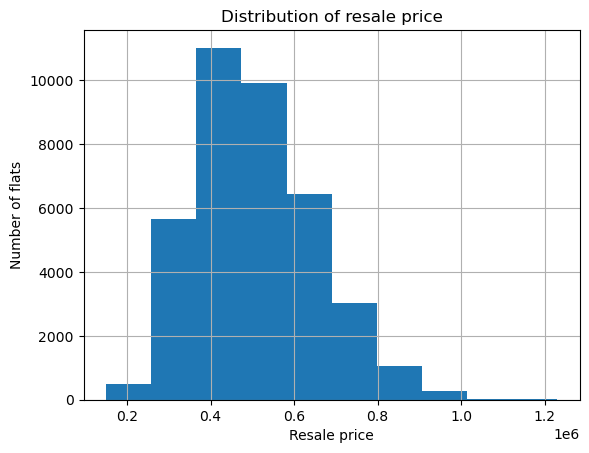

In [7]:
## Understanding distribution of target
col_y = 'resale_price'

## Plot histogram
df[col_y].hist()
plt.title(f"Distribution of resale price")
plt.suptitle('')  # Remove default title by Pandas
plt.xlabel("Resale price")
plt.ylabel("Number of flats")
plt.show()

### 2.3.1.2 Understanding distribution of features

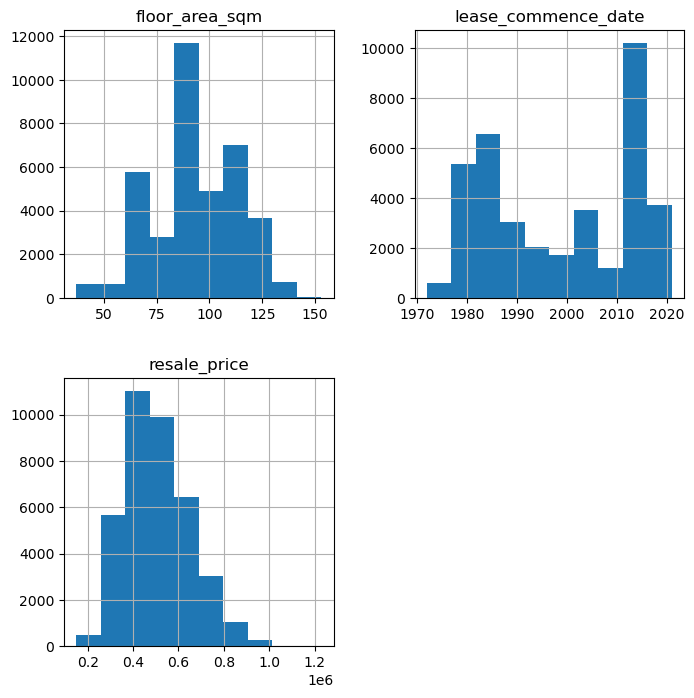

In [8]:
## Plot histogram
df.hist(figsize=(8,8))
plt.show()

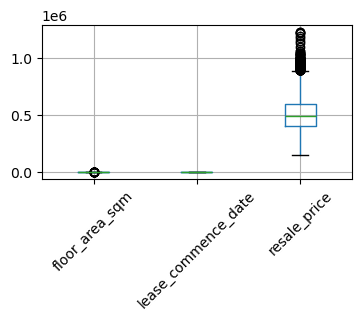

In [9]:
## Plot boxplot for different features
df.boxplot(rot=45, figsize=(4, 2)) ## rot: rotation of label
plt.show()

### 2.3.2 Understanding relationship between variables

In [10]:
## Check datatypes for each column
col_numeric = df.select_dtypes(include=['float', 'int']).columns ## Select all categorical columns

## Display correlation matrix
df_corr = df[col_numeric].corr()
df_corr

,floor_area_sqm,lease_commence_date,resale_price
floor_area_sqm,1.000000,0.078614,0.626896
lease_commence_date,0.078614,1.000000,0.453350
resale_price,0.626896,0.453350,1.000000


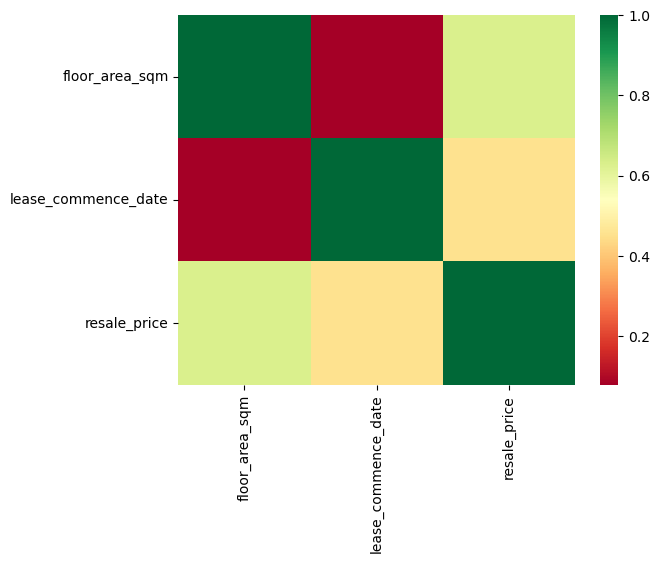

In [11]:
## Plot heatmap
sns.heatmap(df_corr, cmap='RdYlGn')
plt.show()

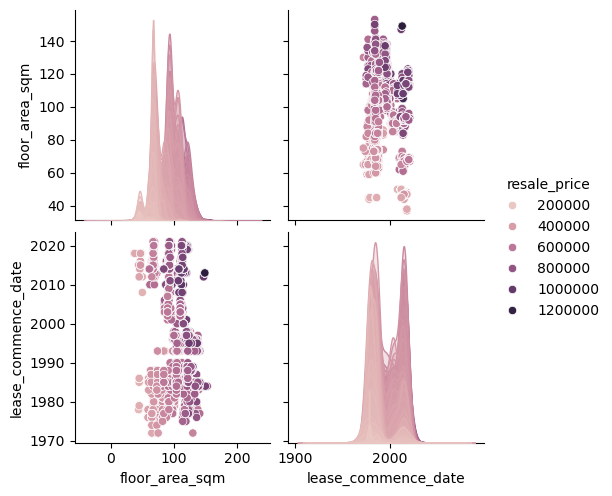

In [12]:
## Plot pairplot
sns.pairplot(df, hue=col_y)
plt.show()

### 🤓 Back to slides 👨🏻‍🏫

# 3. Data Preparation

## 3.1 Data Cleaning

In [13]:
## We have cleaned earlier on

## 3.2 Handling Categorical Data (One-Hot Encoding)

In [14]:
## Check datatypes for each column
col_categorical = df.select_dtypes(include=['object']).columns ## Select all categorical columns

## Print data about categorical column
'''
nunique(): Return total number of unique values in column
unique(): Return unique values in column
'''
for col in df[col_categorical]:
    print(f'{col} ({df[col].nunique()}): {df[col].unique()}') 

town (3): ['BEDOK' 'PUNGGOL' 'TAMPINES']
flat_type (4): ['2 ROOM' '3 ROOM' '4 ROOM' '5 ROOM']
storey_range (9): ['04 TO 06' '07 TO 09' '01 TO 03' '10 TO 12' '13 TO 15' '16 TO 18'
 '19 TO 21' '22 TO 24' '25 TO 27']
flat_model (12): ['Improved' 'New Generation' 'Simplified' 'Model A' 'Premium Apartment'
 'Adjoined flat' 'Model A-Maisonette' 'DBSS' 'Standard'
 'Premium Apartment Loft' '2-room' '3Gen']


In [15]:
## Split data into features (X) and target (y)
y = df[col_y] ## Select target column 

col_irrelevant = [col_y]

X = df.drop(col_irrelevant, axis=1) ## Select feature columns 

## One-Hot Encoding
X = pd.get_dummies(X, 
               drop_first=True ## Remove redundant information
               )
X

,floor_area_sqm,lease_commence_date,town_PUNGGOL,town_TAMPINES,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,storey_range_04 TO 06,storey_range_07 TO 09,storey_range_10 TO 12,...,flat_model_Adjoined flat,flat_model_DBSS,flat_model_Improved,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Simplified,flat_model_Standard
56,45.0,1978,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
57,68.0,1980,False,False,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
58,59.0,1978,False,False,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
59,68.0,1980,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
60,59.0,1976,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205836,114.0,2017,False,True,False,False,True,True,False,False,...,False,False,True,False,False,False,False,False,False,False
205837,114.0,2017,False,True,False,False,True,True,False,False,...,False,False,True,False,False,False,False,False,False,False
205838,114.0,2017,False,True,False,False,True,False,False,True,...,False,False,True,False,False,False,False,False,False,False
205839,138.0,1985,False,True,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,False,False


## 3.3 Train-Test Split

In [16]:
from sklearn.model_selection import train_test_split

## Split data into train set and test set
test_size = 0.3 
random_state = 2025 ## For reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=test_size, 
                                                    random_state=random_state)

### 🤓 Back to slides 👨🏻‍🏫

# 4. Modelling

### 4.2 Train Model

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

## Initialise model
dt = DecisionTreeRegressor() ## Decision Tree Regressor model
dt.fit(X_train, y_train) ## Train model

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


### 🤓 Back to slides 👨🏻‍🏫

# 5. Model Evaluation

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

## Evaluate model
y_pred_dt = dt.predict(X_test) ## Prediction using model 1

## Calculate error
E = y_pred_dt - y_test
E

145552    -35658.153846
144952    -56303.703704
138550    -43847.250000
130840    -28984.432432
81821      56145.185185
              ...      
144600    -37340.163265
158688    -60727.272727
163259    -20241.882353
185157    -96126.666667
157713   -115240.888889
Name: resale_price, Length: 11370, dtype: float64

In [19]:
## Calculate mean absolute error
AE = np.abs(E)

MAE = np.mean(AE)
MAE

np.float64(59631.52386505362)

In [20]:
## Calculate mean squared error
SE = E**2

MSE = np.mean(SE)
MSE

np.float64(5606096963.279948)

In [21]:
## Calculate root mean squared error
SE = E**2
SE

MSE = np.mean(SE)
MSE

RMSE = np.sqrt(MSE)
RMSE

np.float64(74873.8737029142)

In [22]:
print("Decision Tree Regression MAE: ", mean_absolute_error(y_test, y_pred_dt)) ## Calculate accuracy of model 1
print("Decision Tree Regression MSE: ", mean_squared_error(y_test, y_pred_dt)) ## Calculate accuracy of model 1
print("Decision Tree Regression RMSE: ", root_mean_squared_error(y_test, y_pred_dt)) ## Calculate accuracy of model 1
print("Decision Tree Regression R**2: ", r2_score(y_test, y_pred_dt)) ## Calculate accuracy of model 1

Decision Tree Regression MAE:  59631.52386505362
Decision Tree Regression MSE:  5606096963.279948
Decision Tree Regression RMSE:  74873.8737029142
Decision Tree Regression R**2:  0.7262677346465541


In [23]:
## Retrieve feature importance
df_dt_feat_impt = pd.DataFrame({
                                'Feature': dt.feature_names_in_,
                                'Importance': dt.feature_importances_
                              }).sort_values(by='Importance', ascending=False)

df_dt_feat_impt['Cumulative importance'] = df_dt_feat_impt['Importance'].cumsum()

df_dt_feat_impt

,Feature,Importance,Cumulative importance
0,floor_area_sqm,6.060814e-01,0.606081
1,lease_commence_date,2.133315e-01,0.819413
2,town_PUNGGOL,7.318583e-02,0.892599
17,flat_model_DBSS,2.463681e-02,0.917236
3,town_TAMPINES,1.250974e-02,0.929745
4,flat_type_3 ROOM,9.049063e-03,0.938794
5,flat_type_4 ROOM,8.451130e-03,0.947246
19,flat_model_Model A,7.836472e-03,0.955082
9,storey_range_10 TO 12,6.687334e-03,0.961769
7,storey_range_04 TO 06,5.778575e-03,0.967548


C:\Users\KE\AppData\Local\Temp\ipykernel_9640\1112972470.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_dt_feat_impt['Feature'], rotation=45, ha='right')


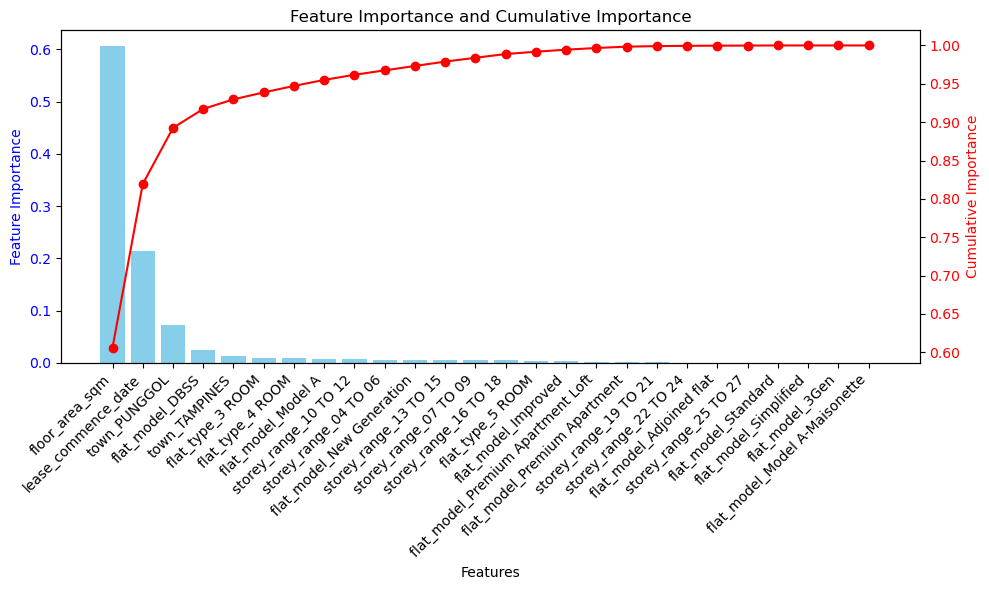

In [24]:
## Plot feature importance and cumulative importance
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for feature importance
ax1.bar(df_dt_feat_impt['Feature'], df_dt_feat_impt['Importance'], color='skyblue')
ax1.set_xlabel('Features')
ax1.set_ylabel('Feature Importance', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(df_dt_feat_impt['Feature'], rotation=45, ha='right')

# Line chart for cumulative importance
ax2 = ax1.twinx()
ax2.plot(df_dt_feat_impt['Feature'], df_dt_feat_impt['Cumulative importance'], color='red', marker='o')
ax2.set_ylabel('Cumulative Importance', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Feature Importance and Cumulative Importance')
plt.tight_layout()
plt.show()


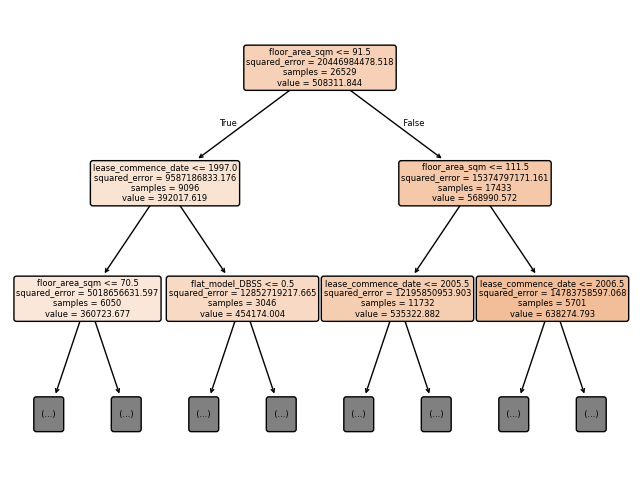

In [25]:
from sklearn.tree import plot_tree

plt.figure(figsize=(8, 6))
plot_tree(dt, 
          feature_names=dt.feature_names_in_, 
          max_depth=2, 
          filled=True, 
          rounded=True,
          fontsize=6
          ) ## max_depth 3 to look at the top level instead of whole tree
plt.show()


### 🤓 Back to slides 👨🏻‍🏫

### 🤔 Challenge: How do we predict new HDB price based on new unseen data?

In [31]:
## New data
X_unseen = pd.read_csv(FILE_PATH) ## For simplicity, we load back our original dataset

## Convert to OHE Pandas dataframe
col_df_X = df.drop(col_y, axis=1).columns ## Select feature columns
col_ohe = X.columns.tolist() ## Select feature column names after OHE

X_unseen = pd.DataFrame(X_unseen, columns=col_df_X) ## Convert to Pandas dataframe
X_unseen = pd.get_dummies(X_unseen, drop_first=True) ## OHE
X_unseen = X_unseen.reindex(columns=col_ohe, fill_value=0) ## Provide OHE columns
display(X_unseen) 

## Predict
X_unseen['Predicted GPA'] = dt.predict(X_unseen)
X_unseen

## Compare with groundtruth
y_unseen = pd.read_csv(FILE_PATH) ## For simplicity, we load back our original dataset
X_unseen['Actual'] = y_unseen[col_y]
X_unseen

,floor_area_sqm,lease_commence_date,town_PUNGGOL,town_TAMPINES,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,storey_range_04 TO 06,storey_range_07 TO 09,storey_range_10 TO 12,...,flat_model_Adjoined flat,flat_model_DBSS,flat_model_Improved,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Simplified,flat_model_Standard
0,44.0,1979,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
1,67.0,1978,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,67.0,1980,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,68.0,1980,False,False,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,67.0,1980,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207870,146.0,1988,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
207871,142.0,1987,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
207872,146.0,1988,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
207873,142.0,1988,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


,floor_area_sqm,lease_commence_date,town_PUNGGOL,town_TAMPINES,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,storey_range_04 TO 06,storey_range_07 TO 09,storey_range_10 TO 12,...,flat_model_Improved,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Simplified,flat_model_Standard,Predicted GPA,Actual
0,44.0,1979,False,False,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,292500.000000,232000.0
1,67.0,1978,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,310056.603774,250000.0
2,67.0,1980,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,282500.000000,262000.0
3,68.0,1980,False,False,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,327659.836735,265000.0
4,67.0,1980,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,282500.000000,265000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207870,146.0,1988,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,759972.000000,1100888.0
207871,142.0,1987,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,757500.000000,988000.0
207872,146.0,1988,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,768000.000000,975000.0
207873,142.0,1988,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,674629.333333,1000000.0
